In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        directory = r"chest_xray\train",
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 3568 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        directory = r"chest_xray/test/",
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 1145 images belonging to 2 classes.


In [4]:
validation = ImageDataGenerator(rescale=1./255)
vall = test_datagen.flow_from_directory(
        directory = r"chest_xray/val/",
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 1143 images belonging to 2 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
#Step1:- Convolution 
cnn.add(tf.keras.layers.Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu' ))
cnn.add(keras.Input(shape=(64, 64, 3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2 , strides = 2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 128 , activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))

In [7]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
history=cnn.fit(x = training_set , validation_data = vall , epochs = 25)

Epoch 1/25
112/112 [==============================] - 104s 910ms/step - loss: 0.3737 - accuracy: 0.8360 - val_loss: 0.1625 - val_accuracy: 0.9318
Epoch 2/25
112/112 [==============================] - 189s 2s/step - loss: 0.2158 - accuracy: 0.9131 - val_loss: 0.1569 - val_accuracy: 0.9318
Epoch 3/25
112/112 [==============================] - 197s 2s/step - loss: 0.2050 - accuracy: 0.9212 - val_loss: 0.1305 - val_accuracy: 0.9501
Epoch 4/25
112/112 [==============================] - 200s 2s/step - loss: 0.1871 - accuracy: 0.9294 - val_loss: 0.2268 - val_accuracy: 0.9073
Epoch 5/25
112/112 [==============================] - 239s 2s/step - loss: 0.1714 - accuracy: 0.9330 - val_loss: 0.1662 - val_accuracy: 0.9353
Epoch 6/25
112/112 [==============================] - 121s 1s/step - loss: 0.1702 - accuracy: 0.9339 - val_loss: 0.1194 - val_accuracy: 0.9519
Epoch 7/25
112/112 [==============================] - 78s 702ms/step - loss: 0.1655 - accuracy: 0.9353 - val_loss: 0.1320 - val_accuracy: 0

In [26]:
test_loss, test_acc = cnn.evaluate(test_set, verbose=2)
print("The accuracy of the model is:")
print(test_acc)

36/36 - 23s - loss: 0.4820 - accuracy: 0.8838 - 23s/epoch - 628ms/step
The accuracy of the model is:
0.8838427662849426


1/1 [==============================] - 0s 228ms/step


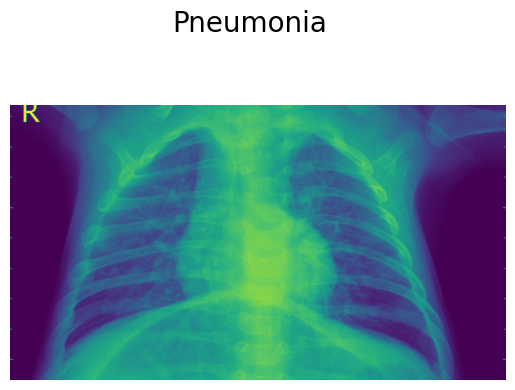

In [10]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.image as mpimg
import os.path

image_path = "chest_xray\\test\\PNEUMONIA\\test_pneu_315.jpeg"
image = mpimg.imread(image_path)

test_image = load_img(image_path, target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
  prediction = 'Normal'
else:
  prediction = 'Pneumonia'
  
plt.imshow(image);plt.suptitle(prediction, fontsize = 20);plt.axis('off');plt.show()

In [20]:
prob = cnn.predict(test_set)

36/36 [==============================] - 58s 2s/step


In [32]:
prob

array([[0.97653335],
       [0.99945986],
       [0.9982028 ],
       ...,
       [0.99952465],
       [0.99412495],
       [0.99995685]], dtype=float32)

In [33]:
pred= cnn.predict(test_set)
for i in range(len(pred)):
    pred[i] = 1 if pred[i]>0.5 else 0

36/36 [==============================] - 55s 2s/step


In [34]:
pred

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

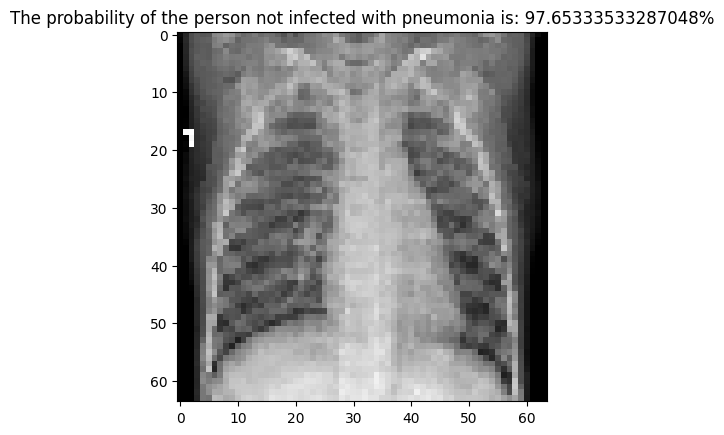

In [37]:
x=test_set.next()
for i in range(0,1):
    image=x[i]
    for j in range(0,1):
        plt.imshow(image[j]);plt.title(f"The probability of the person not infected with pneumonia is: {prob[j][0]*100}%");plt.show()

(-0.01, 0.1)

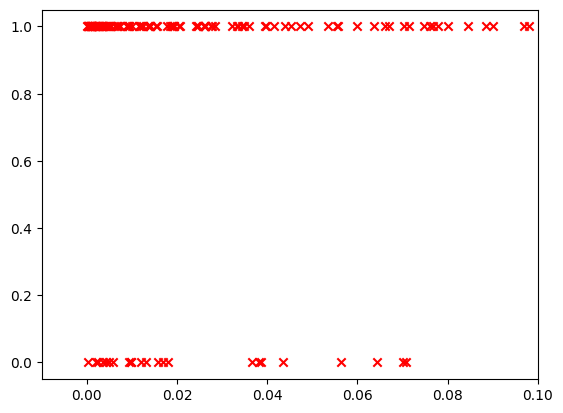

In [31]:
plt.scatter(prob, predictions,marker = 'x',color = 'r')
plt.xlim([-0.01, 0.1])